In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Softmax, Activation, Input, CategoryEncoding, Dropout, BatchNormalization
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import base64
print(tf.__version__)


2.15.0


In [2]:
x_test = np.load("./x_test.npy")

In [3]:
#Cấu trúc mô hình
# model = Sequential()
# model.add(Conv2D(16, (3,3), input_shape=(64, 64, 3)))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(32, (3,3)))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(64, (3,3)))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='relu'))
# # model.add(Dense(7, activation='softmax'))
# # model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=['mse'])

# model.load_weights("age_classify_v50_30e.h5")
model = tf.keras.saving.load_model("../age_estimate_v203_30e_c5.keras")
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)         

In [4]:
face_cascade  = cv2.CascadeClassifier()
face_cascade.load("../haarcascade_frontalface_default.xml")

True

In [5]:
imgs = []
imgs_path = []
imgs_original = []
for name in os.listdir("./assets"):
    if name == "Train":
        continue
    img_path = f"./assets/{name}"
    imgs_path.append(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = remove(img)
    # img = img[:, :, :3]
    imgs_original.append(img)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = cv2.equalizeHist(img_gray)
    faces = face_cascade.detectMultiScale(img_gray, minNeighbors=10, minSize=(60, 60))
    for (x, y, w, h) in faces:
        img_ = img[y:y+h, x:x+h]
        # img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
        img_ = cv2.resize(img_, (64, 64))
        img_ = img_ / 255.0
        print(img_.shape)
        imgs.append(img_)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


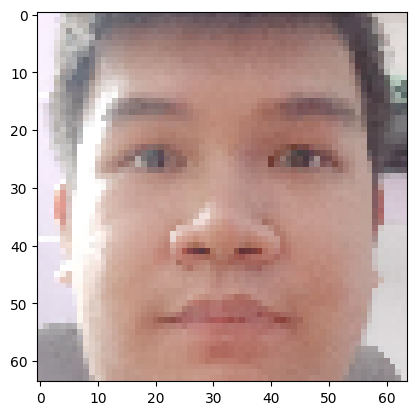

In [6]:
imgs = np.array(imgs)
plt.imshow(imgs[-2])
plt.show()

In [7]:
pred = model.predict(imgs)
# opred = model.predict(imgs_original)
# y_fonf = fonf.predict(imgs)

1/1 [==============================] - 0s 251ms/step


In [8]:
pred = pred.argmax(axis=1)

In [9]:
print(pred)

[0 3 4 0 2 0 3 1 4 5 0 3]


In [10]:
# y_fonf.argmax(axis=1)

In [11]:
age_group = ["0 - 5", "6 - 11", "12 - 17", "18 - 23", "24 - 29", "30 - 35", "36 - 41", "42 - 47", "48 - 53", "54 - 59", "60 - 65", ">=66"] # i =5

plt.figure(figsize=(20, 5))
for i, x in enumerate(pred):
    print("Predicted:"+ str(x))

Predicted:0
Predicted:3
Predicted:4
Predicted:0
Predicted:2
Predicted:0
Predicted:3
Predicted:1
Predicted:4
Predicted:5
Predicted:0
Predicted:3


<Figure size 2000x500 with 0 Axes>

In [12]:
def display_images(images, pred, columns=3):
    # Calculate the number of rows needed
    rows = int(np.ceil(len(images) / columns))

    # Create a subplot grid
    fig, axs = plt.subplots(rows, columns, figsize=(12, 4*rows))

    # Flatten the subplot array to handle varying numbers of rows
    axs = axs.flatten()

    # Iterate through images and display them
    for i, image in enumerate(images):
        axs[i].imshow(image, cmap='gray')  # Assuming grayscale images
        axs[i].set_title(f"Độ tuổi: {str(age_group[pred[i]])}")
        axs[i].axis('off')

    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.show()

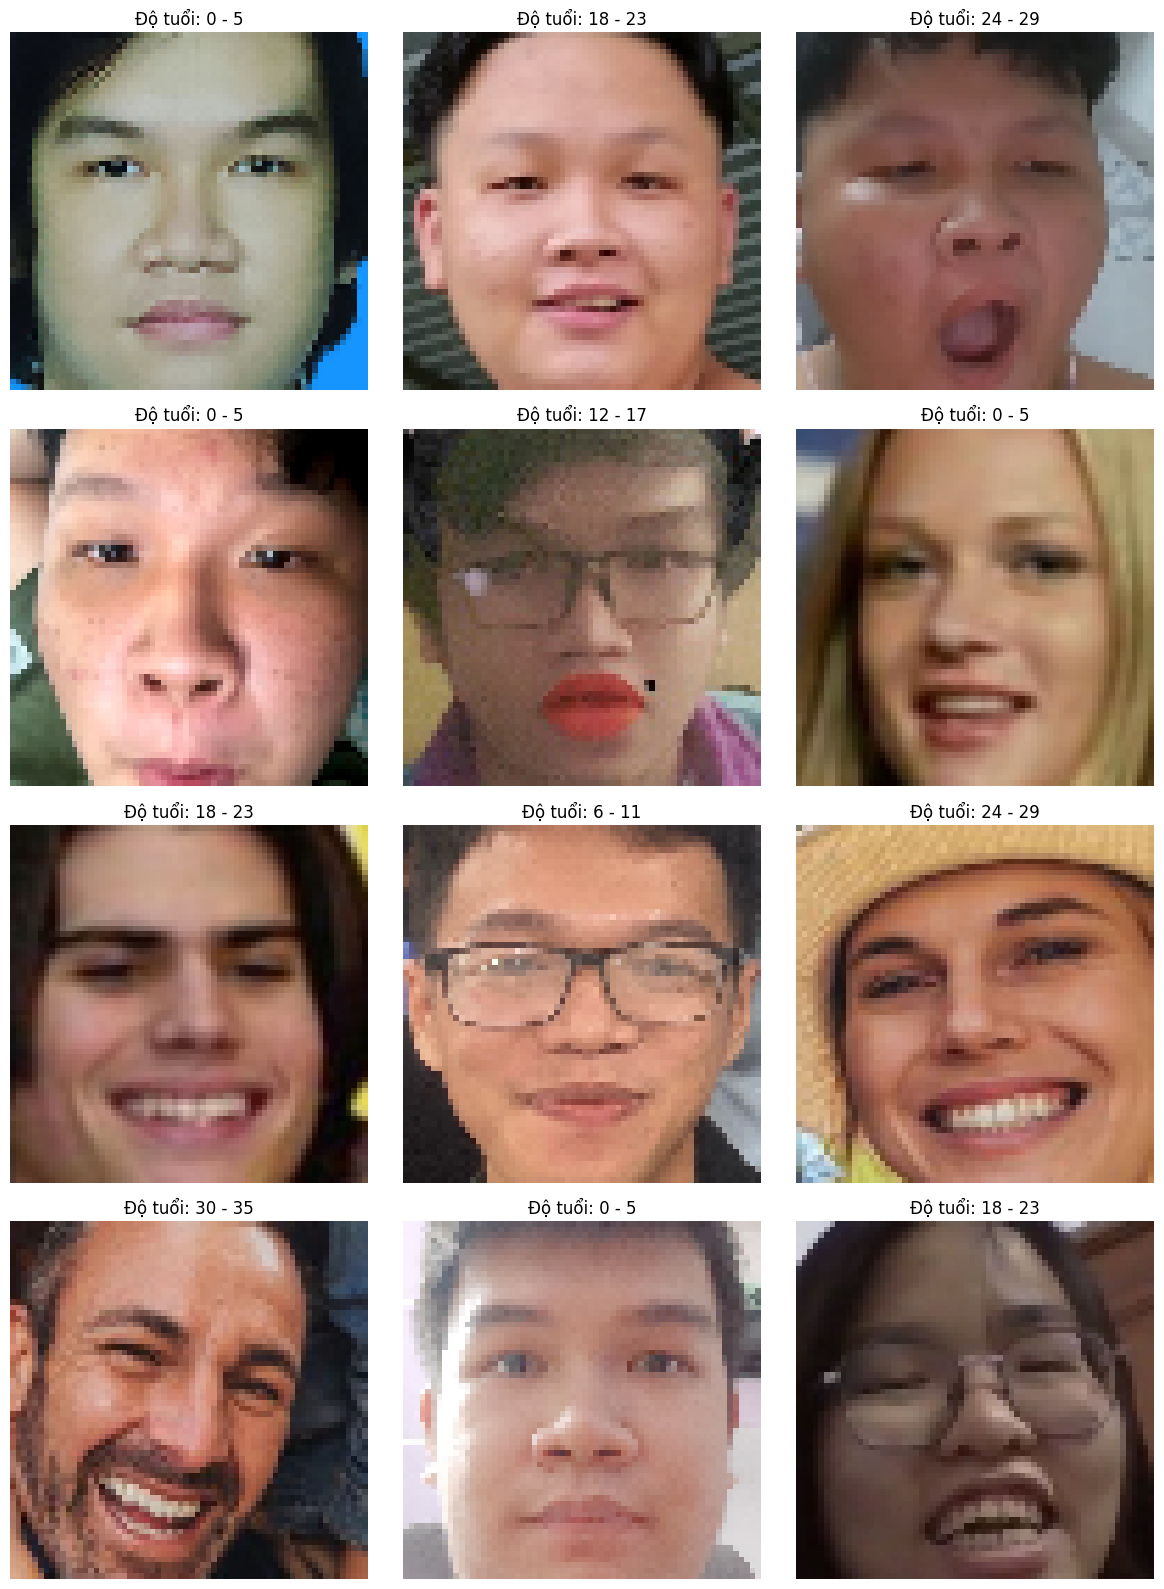

In [13]:
display_images(imgs, pred)

In [14]:
# n_unknown = 0
# for x in pred.argmax(axis=1):
#     n_unknown += 1 if x == 7 else 0
# n_unknown / len(pred.argmax(axis=1))

In [15]:
# new_model = build_your_model_function()  # Create a new instance of your model
# new_model.load_weights("age_classify_v50_30e.h5")
# predictions = new_model.predict(imgs)
